In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load Lena image processing 

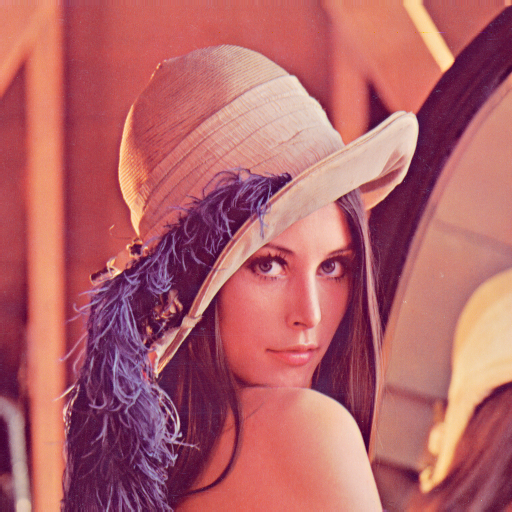

In [2]:
Lenna = Image.open("C:/Users/E016583/OneDrive - MFP Michelin/Desktop/Cours/Deep Learning/data/Lenna.png")
Lenna

# Convert images to numpy array 
Bi-dimensionnal array are in grey, Tri-dimensionnal are in color 

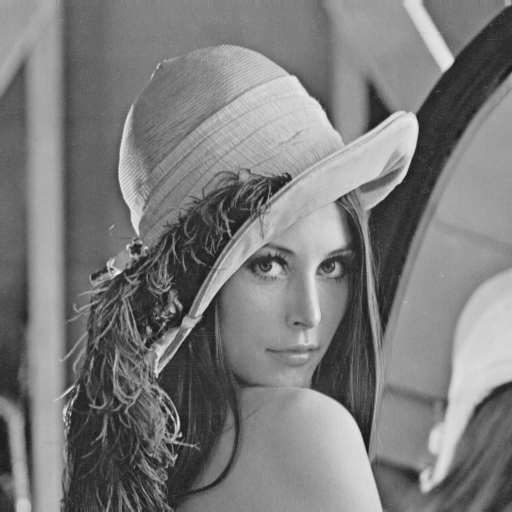

In [3]:
Lenna_2d = Lenna.convert("L")
Lenna_2d

In [4]:
np_Lenna_2d = np.array(Lenna_2d)
np_Lenna_2d

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [5]:
np_Lenna_2d.shape

(512, 512)

In [6]:
def plot(image):
    plt.figure(figsize=(10,10))
    plt.imshow(image, cmap ="gray")

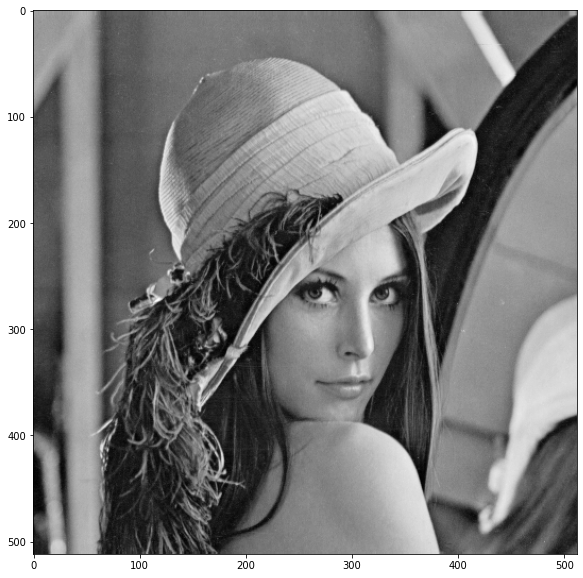

In [7]:
plot(np_Lenna_2d)

# Apply the convolution without padding
With a 3x3 stride 1,first with detection filter with vertical edge then with horizontal

In [8]:
horizontal_filter = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
vertical_filter = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

In [9]:
def convolution(image, _filter):
    """apply convolution without padding"""
    
    assert _filter.shape[0] % 2 == 1, """filter length must odd"""
    assert _filter.shape[1] % 2 == 1, """filter width must odd"""
    
    new_image = np.zeros((image.shape[0] - _filter.shape[0]+1, image.shape[1] - _filter.shape[1]+1))
    
    
    for i in range(0, image.shape[0] - _filter.shape[0] + 1):
        for j in range(0, image.shape[1] - _filter.shape[1] + 1):
            new_image[i, j] = np.sum(image[i:i+_filter.shape[0], j:j+_filter.shape[1]] * _filter)
            
    return new_image

# Plot the result 
and it's shape

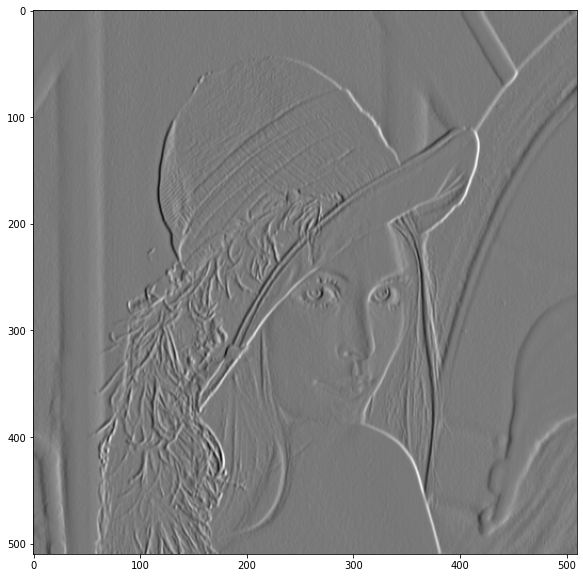

In [10]:
lenna_2d_horizontal = convolution(np_Lenna_2d , horizontal_filter)
plot(lenna_2d_horizontal)

In [11]:
lenna_2d_horizontal.shape

(510, 510)

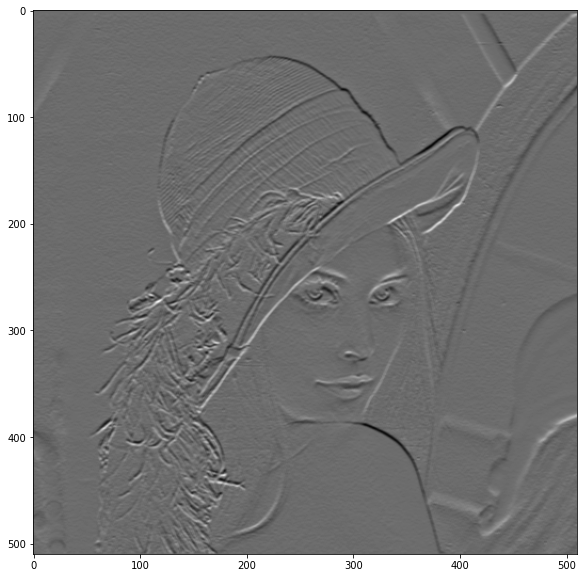

In [12]:
lenna_2d_vertical = convolution(np_Lenna_2d , vertical_filter)
plot(lenna_2d_vertical)

In [13]:
lenna_2d_vertical.shape

(510, 510)

# Convolution on colored images

In [14]:
np_Lenna_3d = np.array(Lenna)

In [15]:
np_Lenna_3d[:,:,0] # Red color of the 512*512 pixels

array([[226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       ...,
       [ 84,  84,  92, ..., 173, 172, 177],
       [ 82,  82,  96, ..., 179, 181, 185],
       [ 82,  82,  96, ..., 179, 181, 185]], dtype=uint8)

In [16]:
def convolution_3d(image, _filter):
    """ Apply the convolution to a colored image"""

        
    assert _filter.shape[0] % 2 == 1, """filter length must odd"""
    assert _filter.shape[1] % 2 == 1, """filter width must odd"""
    
    new_image = np.zeros((image.shape[0] - _filter.shape[0]+1, image.shape[1] - _filter.shape[1]+1, 3))
    
    for k in range(3):
        new_image[:,:,k] = convolution(image[:,:,k], _filter)
        
    return new_image

In [17]:
lenna_3d_vertical = convolution_3d(np_Lenna_3d , vertical_filter)

In [18]:
# Need to cast it between 0 and 255 for the imshow 
lenna_3d_vertical = (lenna_3d_vertical * 255).astype(np.uint8)

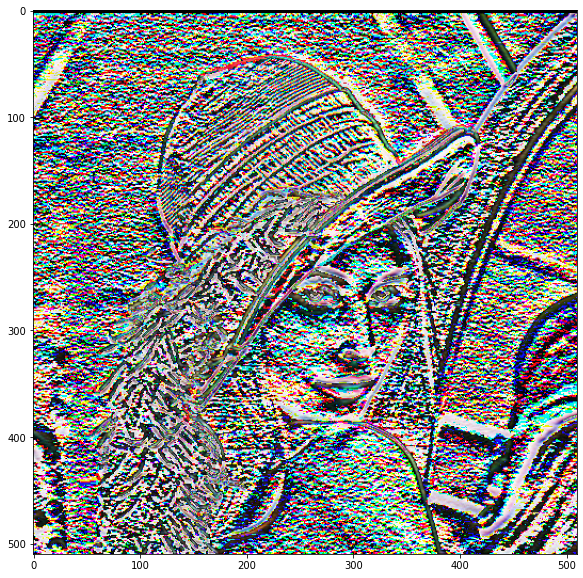

In [19]:
plot(lenna_3d_vertical)

In [20]:
lenna_3d_horizontal = convolution_3d(np_Lenna_3d , horizontal_filter)

In [21]:
# same as before
lenna_3d_horizontal = (lenna_3d_horizontal * 255).astype(np.uint8)

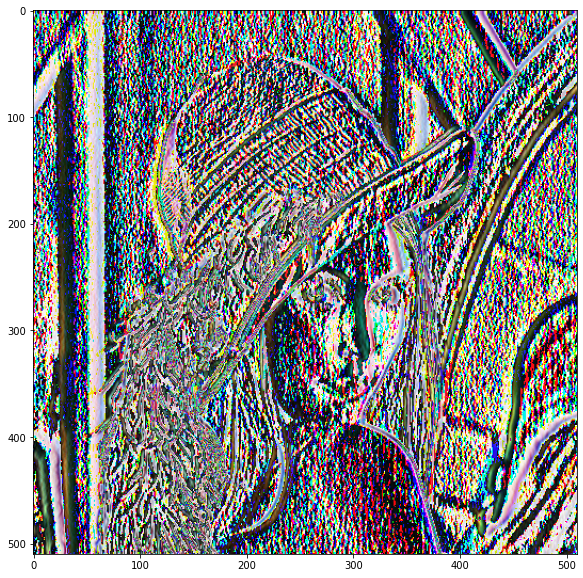

In [22]:
plot(lenna_3d_horizontal)

# Apply a Maxpool after the convolution filter
with a 2x2 stride 2 

In [23]:
def maxpool(image , size :tuple):
    
    assert image.shape[0] % size[0] == 0, "image.shape[0] must be a multiple of size[0]"
    assert image.shape[1] % size[1] == 0, "image.shape[1] must be a multiple of size[1]"
    new_image = np.zeros((int(image.shape[0]/size[0]), int(image.shape[1]/size[1])))
    
    for i in range(0, image.shape[0], size[0]):
        for j in range(0, image.shape[1], size[1]):
            new_image[int(i/size[0]), int(j/size[1])] = np.max(image[i:i+size[0], j:j+size[1]])
        
    return new_image
    

In [24]:
max_lenna_horizontal = maxpool(lenna_2d_horizontal, (2,2))

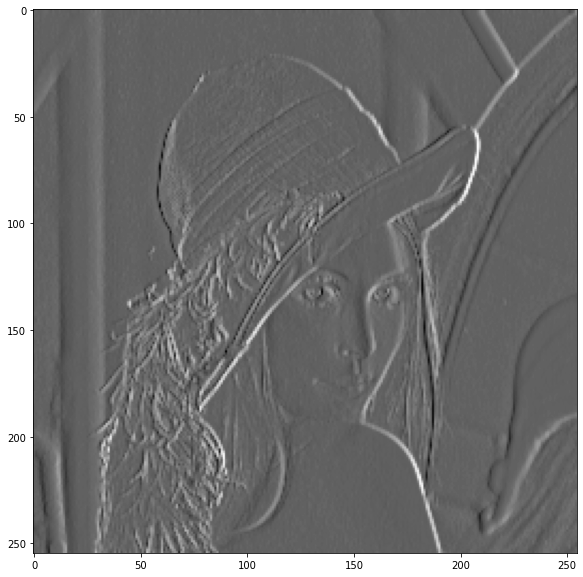

In [25]:
plot(max_lenna_horizontal)

In [26]:
max_lenna_horizontal.shape

(255, 255)

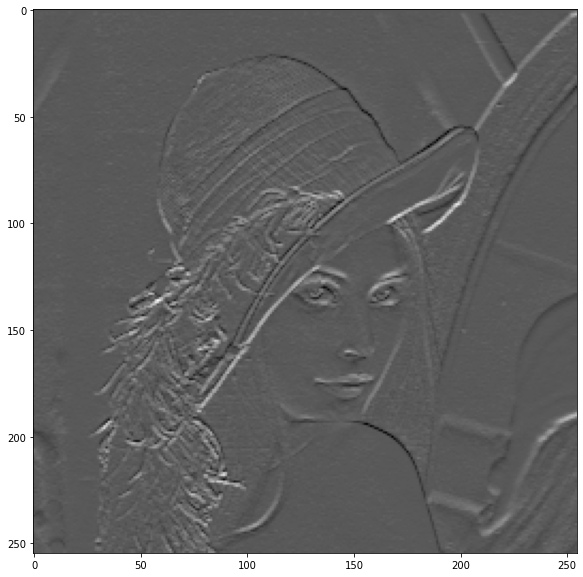

In [27]:
max_lenna_vertical = maxpool(lenna_2d_vertical, (2,2))
plot(max_lenna_vertical)

In [28]:
def maxpool_3d(image , size :tuple):
    
    assert image.shape[0] % size[0] == 0, "image.shape[0] must be a multiple of size[0]"
    assert image.shape[1] % size[1] == 0, "image.shape[1] must be a multiple of size[1]"
    
    new_image = np.zeros( (int(image.shape[0] / size[0]), int(image.shape[1] / size[1]), 3) )
    
    for k in range(3):
        new_image[:,:,k] = maxpool(image[:,:,k], size)
        
    return new_image

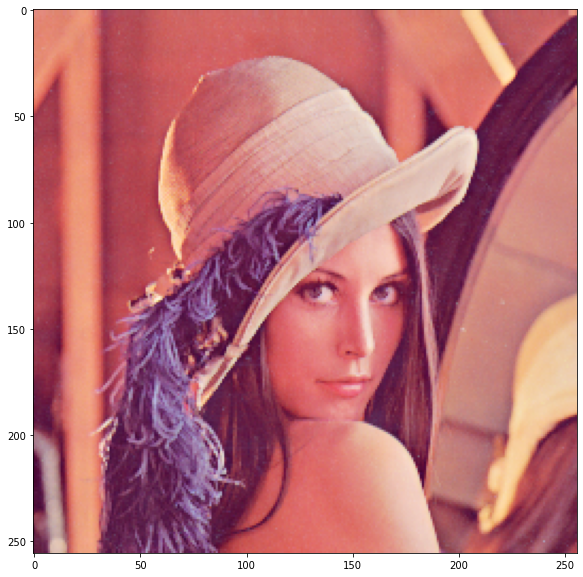

In [29]:
maxpool_3d_lenna = maxpool_3d(np_Lenna_3d, (2,2))
plot(maxpool_3d_lenna.astype(int))

### With a 8X8 stride

In [30]:
maxpool_3d_lenna2 = maxpool_3d(np_Lenna_3d, (8,8))

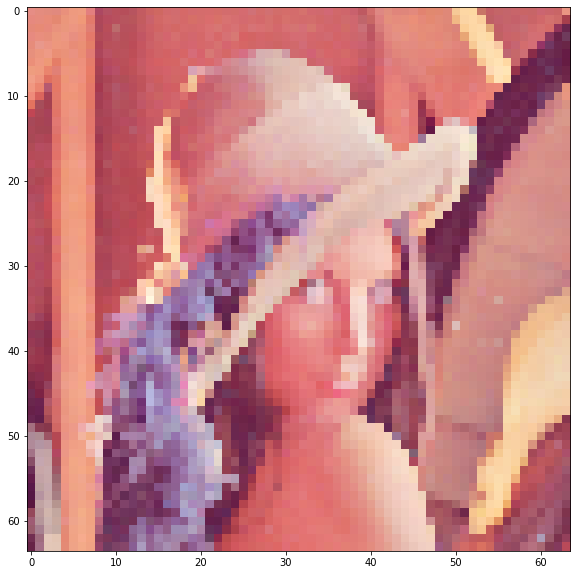

In [31]:
plot(maxpool_3d_lenna2.astype(int))

# Test with a new image

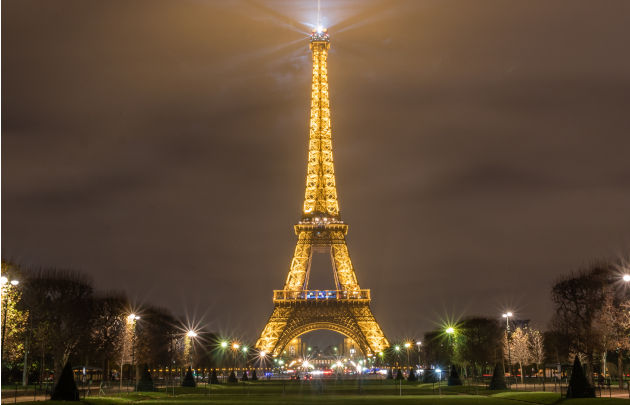

In [32]:
effeil_tower = Image.open("C:/Users/E016583/OneDrive - MFP Michelin/Desktop/Cours/Deep Learning/data/tour_eiffel.jpg")
effeil_tower

In [33]:
effeil_tower_3d = np.array(effeil_tower)

In [34]:
effeil_tower_3d.shape

(405, 630, 3)

In [35]:
# test avec une fenetre de 5*10, 5 divise bien 405 et 10 divise bien 630
maxpool_effeil_tower_3d = maxpool_3d(effeil_tower_3d, (5,10))

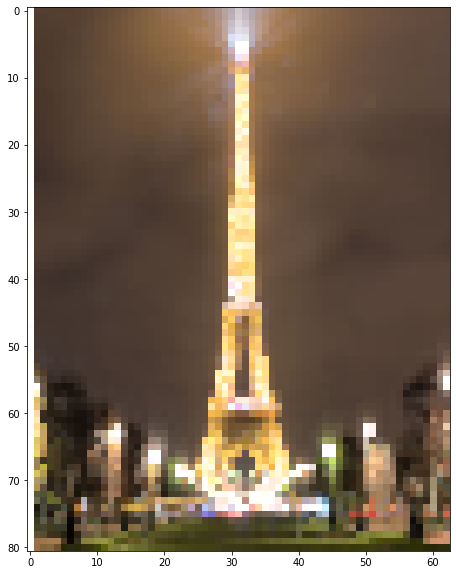

In [36]:
plot(maxpool_effeil_tower_3d.astype(int))